In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diab_df=pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv",sep=',')

In [3]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data=diab_df.drop(['Pregnancies','Outcome'],axis=1)

In [6]:
data.replace(0,np.nan,inplace=True)
data.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [7]:
data['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [8]:
np.round(data['Insulin'].mean())

156.0

In [9]:
data['Insulin'].replace(np.nan,np.round(data['Insulin'].mean()),inplace=True)

In [10]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
diab_array=impute.fit_transform(data)

In [11]:
diabetes_df=pd.DataFrame(diab_array,columns = data.columns)

In [12]:
diabetes_df['Pregnancies'] = diab_df.Pregnancies
diabetes_df['Outcome'] = diab_df.Outcome

diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1,1


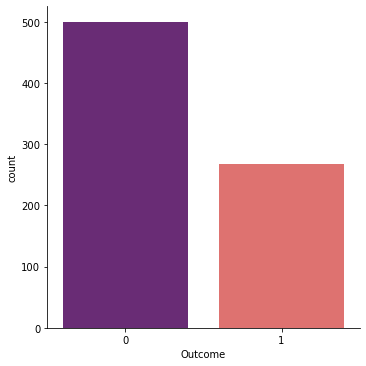

In [13]:
sns.catplot(x = "Outcome", kind = "count", data = diabetes_df, palette='magma')

In [15]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
df_0=diabetes_df[diabetes_df['Outcome']==0]
df_1=diabetes_df[diabetes_df['Outcome']==1]

In [19]:
from sklearn.utils import resample
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state= 123)
diabetes_df1 = pd.concat([df_0, df_1_upsample])

In [20]:
diabetes_df1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
5,116.0,74.0,29.0,156.0,25.6,0.201,30.0,5,0
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10,0
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4,0
...,...,...,...,...,...,...,...,...,...
429,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1,1
701,125.0,78.0,31.0,156.0,27.6,0.565,49.0,6,1
476,105.0,80.0,45.0,191.0,33.7,0.711,29.0,2,1
579,197.0,70.0,99.0,156.0,34.7,0.575,62.0,2,1


# Correlation

<AxesSubplot:>

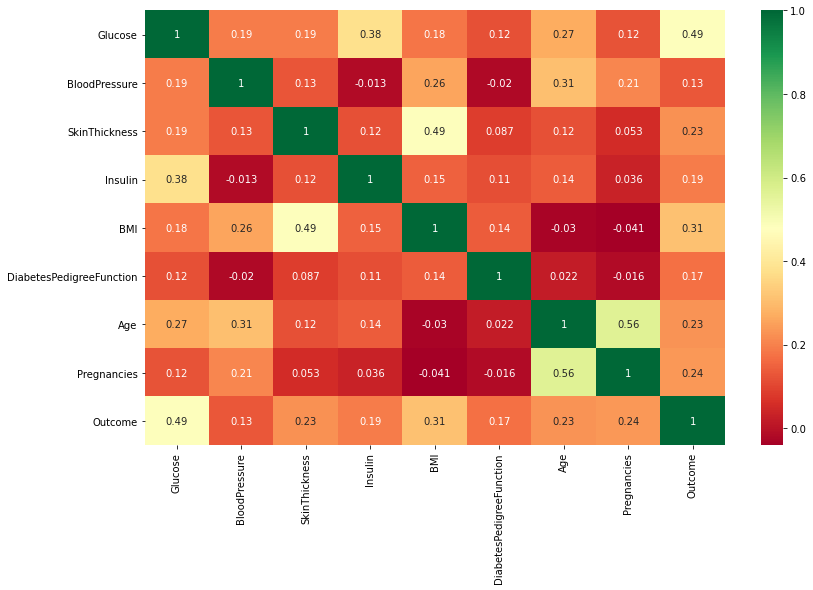

In [23]:
plt.figure(figsize=(13,8))
sns.heatmap(diabetes_df1.corr(),annot=True, cmap="RdYlGn")

In [24]:
X = diabetes_df1.drop(['Outcome'], axis = 1)
Y = diabetes_df1['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [25]:
def build_model():
    model=Sequential()
    model.add(Dense(units=64,activation='relu',input_shape=[len(X.keys())]))
    model.add(Dropout(0.2))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='sigmoid'))

    optimizers=Adam(learning_rate=0.001)

    model.compile(loss='binary_crossentropy',optimizer=optimizers,metrics=['accuracy'])
    return model

In [27]:
model=build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [28]:
# CallBacks
from keras import callbacks
filepath="E:\Ai\Best_diabetes.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor = 'val_loss', save_best_model = True, mode = 'min', verbose = 1)
checkpoint

In [29]:
import datetime
import keras
import os
logdir = os.path.join("E:\Ai\logs_diabetes", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = keras.callbacks.TensorBoard(logdir)

In [31]:
model.fit(X_train,Y_train, epochs = 500, batch_size= 25, validation_split = 0.2,callbacks = [checkpoint, tensorboard_callback])

Epoch 1/500
26/26 [==============================] - 6s 84ms/step - loss: 5.3905 - accuracy: 0.4891 - val_loss: 1.8138 - val_accuracy: 0.4938

Epoch 00001: saving model to E:\Ai\Best_diabetes.hdf5
Epoch 2/500
26/26 [==============================] - 0s 10ms/step - loss: 2.4701 - accuracy: 0.5063 - val_loss: 0.6505 - val_accuracy: 0.6812

Epoch 00002: saving model to E:\Ai\Best_diabetes.hdf5
Epoch 3/500
26/26 [==============================] - 0s 8ms/step - loss: 1.7565 - accuracy: 0.5422 - val_loss: 0.8142 - val_accuracy: 0.6000

Epoch 00003: saving model to E:\Ai\Best_diabetes.hdf5
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 1.5365 - accuracy: 0.5328 - val_loss: 0.6067 - val_accuracy: 0.6750

Epoch 00004: saving model to E:\Ai\Best_diabetes.hdf5
Epoch 5/500
26/26 [==============================] - 0s 7ms/step - loss: 1.1161 - accuracy: 0.5531 - val_loss: 0.6248 - val_accuracy: 0.6812

Epoch 00005: saving model to E:\Ai\Best_diabetes.hdf5
Epoch 6/500
26/26 

In [33]:
model.load_weights("E:\Ai\Best_diabetes.hdf5")

In [35]:
predictions=model.predict(X_test)

In [36]:
display(predictions)

array([[6.28715038e-01],
       [5.79333365e-01],
       [9.88533616e-01],
       [4.40234721e-01],
       [9.98822749e-01],
       [7.70109117e-01],
       [9.82347131e-03],
       [8.15093517e-04],
       [3.57997715e-02],
       [7.90385604e-02],
       [8.72008695e-06],
       [3.26313287e-01],
       [1.86583400e-03],
       [9.63597536e-01],
       [3.82715553e-01],
       [7.83226550e-01],
       [7.83285975e-01],
       [3.80735844e-01],
       [7.38024652e-01],
       [5.51581383e-04],
       [5.40345907e-04],
       [3.57635379e-01],
       [9.73269820e-01],
       [2.05401778e-01],
       [5.69963217e-01],
       [9.50017869e-02],
       [2.03743279e-02],
       [8.66413951e-01],
       [3.06870967e-01],
       [4.44010347e-01],
       [8.30188036e-01],
       [2.43887305e-03],
       [8.50378633e-01],
       [9.96129155e-01],
       [2.54696608e-03],
       [6.14643097e-04],
       [1.34248779e-07],
       [7.80199647e-01],
       [6.90965950e-01],
       [7.50882030e-01],


In [37]:
yhat=np.round(predictions)

7/7 [==============================] - 0s 2ms/step - loss: 0.8523 - accuracy: 0.7300


<AxesSubplot:>

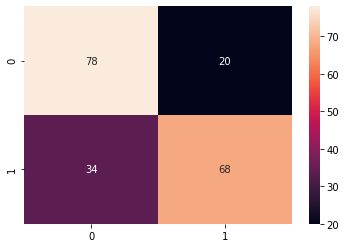

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
model.evaluate(X_test,Y_test)
sns.heatmap(confusion_matrix(Y_test,yhat),annot=True)

In [ ]:
print(classification_report(Y_test,yhat))